In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import openpyxl
%matplotlib inline
df_bloodLvls = pd.read_csv("BloodLevels.csv")

In [2]:
df_bloodLvls.describe()

geo_area_id  borough_id  time_period  \
count   576.000000  564.000000   576.000000   
mean    252.708333    2.851064  2010.500000   
std     149.094653    1.255531     3.455053   
min       1.000000    1.000000  2005.000000   
25%     106.750000    2.000000  2007.750000   
50%     256.000000    3.000000  2010.500000   
75%     402.250000    4.000000  2013.250000   
max     504.000000    5.000000  2016.000000   

       Children under 6 years with elevated blood lead levels (BLL) Number BLL >=5 µg/dL  \
count                                         576.000000                                   
mean                                         1016.967014                                   
std                                          3127.307541                                   
min                                             5.000000                                   
25%                                           109.500000                                   
50%                                           267.000000                                   
75%                                           700.250000                                   
max                                         37344.000000                                   

       Children under 6 years with elevated blood lead levels (BLL) Number BLL>=10 µg/dL  \
count                                         576.000000                                   
mean                                           99.234375                                   
std                                           274.841442                                   
min                                             0.000000                                   
25%                                            12.000000                                   
50%                                            31.000000                                   
75%                                            68.000000                                   
max                                          3082.000000                                   

       Children under 6 years with elevated blood lead levels (BLL) Number BLL>=15 µg/dL  \
count                                         576.000000                                   
mean                                           34.130208                                   
std                                            93.393634                                   
min                                             0.000000                                   
25%                                             4.000000                                   
50%                                            11.000000                                   
75%                                            23.250000                                   
max                                          1014.000000                                   

       Children under 6 years with elevated blood lead levels (BLL) Number Tested  \
count                                         576.000000                            
mean                                        20071.180556                            
std                                         48789.333503                            
min                                           800.000000                            
25%                                          4600.000000                            
50%                                          7500.000000                            
75%                                         12200.000000                            
max                                        342900.000000                            

       Children under 6 years with elevated blood lead levels (BLL) Number Tested _NOTES  \
count                                                0.0                                   
mean                                                 NaN                                   
std                                                  N

In [3]:
df_bloodLvls.head(25)

geo_type  geo_area_id geo_area_name  borough_id  time_period  \
0   Borough            1         Bronx         1.0         2005   
1   Borough            1         Bronx         1.0         2006   
2   Borough            1         Bronx         1.0         2007   
3   Borough            1         Bronx         1.0         2008   
4   Borough            1         Bronx         1.0         2009   
5   Borough            1         Bronx         1.0         2010   
6   Borough            1         Bronx         1.0         2011   
7   Borough            1         Bronx         1.0         2012   
8   Borough            1         Bronx         1.0         2013   
9   Borough            1         Bronx         1.0         2014   
10  Borough            1         Bronx         1.0         2015   
11  Borough            1         Bronx         1.0         2016   
12  Borough            2      Brooklyn         2.0         2005   
13  Borough            2      Brooklyn         2.0         2006   
14  Borough            2      Brooklyn         2.0         2007   
15  Borough            2      Brooklyn         2.0         2008   
16  Borough            2      Brooklyn         2.0         2009   
17  Borough            2      Brooklyn         2.0         2010   
18  Borough            2      Brooklyn         2.0         2011   
19  Borough            2      Brooklyn         2.0         2012   
20  Borough            2      Brooklyn         2.0         2013   
21  Borough            2      Brooklyn         2.0         2014   
22  Borough            2      Brooklyn         2.0         2015   
23  Borough            2      Brooklyn         2.0         2016   
24  Borough            3     Manhattan         3.0         2005   

    Children under 6 years with elevated blood lead levels (BLL) Number BLL >=5 µg/dL  \
0                                                8245                                   
1                                                7272                                   
2                                                6174                                   
3                                                4254                                   
4                                                2742                                   
5                                                2625                                   
6                                                1996                                   
7                                                1396                                   
8                                                1312                                   
9                                                1186                                   
10                                                971                                   
11                                                884                                   
12                                              15015                                   
13                                              14199                                   
14                                              12622                                   
15                                               8288                                   
16                                               6719                                   
17                                               6182                                   
18                                               5483                                   
19                                               4017                                   
20                                               3370                                   
21                                               2929                                   
22                                               2458                                   
23                                               2314                                   
24                                 

In [4]:
unique_cities = list(set(df_bloodLvls["geo_area_name"]))
forbidden_cities = ["Bronx", "Brooklyn", "New York City", "Queens", "Staten Island"]
unique_cities
for j in unique_cities:
    if j in forbidden_cities:
        unique_cities.remove(j)
    else:
        continue
print(unique_cities)

['Northeast Bronx', 'Lower Manhattan', 'Chelsea - Clinton', 'Bensonhurst - Bay Ridge', 'Upper West Side', 'Fordham - Bronx Pk', 'West Queens', 'Kingsbridge - Riverdale', 'Crotona -Tremont', 'Pelham - Throgs Neck', 'Southeast Queens', 'Coney Island - Sheepshead Bay', 'Ridgewood - Forest Hills', 'Southwest Queens', 'Hunts Point - Mott Haven', 'Port Richmond', 'Gramercy Park - Murray Hill', 'Upper East Side', 'Long Island City - Astoria', 'Flushing - Clearview', 'Borough Park', 'Downtown - Heights - Slope', 'Manhattan', 'Williamsburg - Bushwick', 'Stapleton - St. George', 'Greenpoint', 'Greenwich Village - SoHo', 'East Flatbush - Flatbush', 'Willowbrook', 'Washington Heights', 'Union Square - Lower East Side', 'Central Harlem - Morningside Heights', 'Jamaica', 'Canarsie - Flatlands', 'High Bridge - Morrisania', 'Rockaways', 'East New York', 'Bedford Stuyvesant - Crown Heights', 'Sunset Park', 'Bayside - Little Neck', 'East Harlem', 'Fresh Meadows', 'South Beach - Tottenville']


In [5]:
averages_List = []
new_avgs = []
def avgs(loc):
    total = 0
    curNum = -1
    countList = []
    for i in df_bloodLvls["geo_area_name"]:
        curNum += 1
        if df_bloodLvls["geo_area_name"][curNum] == loc:
            total += df_bloodLvls["Children under 6 years with elevated blood lead levels (BLL) Number BLL>=15 µg/dL"][curNum]
            countList.append(df_bloodLvls["Children under 6 years with elevated blood lead levels (BLL) Number BLL>=15 µg/dL"][curNum])
        else:
            continue
    averages_List.append(total/12)
    new_avgs.append(total/12)
    return total/12, countList
        
    

In [6]:
for x in unique_cities:
    print(x, avgs(x))
    


Northeast Bronx (12.75, [14, 9, 12, 12, 8, 14, 17, 19, 19, 12, 6, 11])
Lower Manhattan (0.9166666666666666, [0, 2, 1, 2, 1, 1, 1, 0, 0, 0, 1, 2])
Chelsea - Clinton (1.9166666666666667, [1, 2, 0, 1, 3, 4, 3, 3, 2, 2, 1, 1])
Bensonhurst - Bay Ridge (13.583333333333334, [16, 13, 21, 19, 12, 17, 10, 11, 12, 9, 11, 12])
Upper West Side (3.8333333333333335, [4, 1, 3, 7, 4, 7, 3, 2, 6, 0, 6, 3])
Fordham - Bronx Pk (25.833333333333332, [23, 15, 29, 36, 18, 31, 22, 40, 21, 25, 26, 24])
West Queens (45.916666666666664, [42, 17, 40, 67, 44, 53, 80, 21, 19, 21, 63, 84])
Kingsbridge - Riverdale (2.6666666666666665, [1, 1, 4, 4, 2, 0, 1, 2, 7, 3, 3, 4])
Crotona -Tremont (16.916666666666668, [22, 20, 19, 12, 37, 15, 10, 11, 14, 18, 4, 21])
Pelham - Throgs Neck (14.25, [9, 14, 15, 11, 16, 7, 25, 11, 17, 11, 11, 24])
Southeast Queens (8.333333333333334, [12, 9, 9, 7, 4, 6, 8, 5, 13, 17, 4, 6])
Coney Island - Sheepshead Bay (21.25, [25, 19, 21, 28, 20, 17, 17, 26, 17, 22, 14, 29])
Ridgewood - Forest Hil

In [7]:
for p in new_avgs:
    if p == 546.0833333333334:
        new_avgs.remove(p)
        
print(new_avgs)

[12.75, 0.9166666666666666, 1.9166666666666667, 13.583333333333334, 3.8333333333333335, 25.833333333333332, 45.916666666666664, 2.6666666666666665, 16.916666666666668, 14.25, 8.333333333333334, 21.25, 11.416666666666666, 24.416666666666668, 9.416666666666666, 7.25, 1.0, 2.1666666666666665, 12.5, 8.333333333333334, 41.666666666666664, 11.75, 44.666666666666664, 28.916666666666668, 8.583333333333334, 15.166666666666666, 1.1666666666666667, 29.083333333333332, 1.25, 16.25, 4.25, 7.833333333333333, 26.0, 6.0, 16.916666666666668, 6.333333333333333, 21.916666666666668, 34.333333333333336, 12.416666666666666, 0.75, 5.333333333333333, 3.5833333333333335, 1.9166666666666667]


In [8]:
list_05 = []
list_06 = []
list_07 = []
list_08 = []
list_09 = []
list_10 = []
list_11 = []
list_12 = []
list_13 = []
list_14 = []
list_15 = []
list_16 = []
def points(column):
    curNum = -1
    for i in df_bloodLvls["time_period"]:
        curNum += 1
        if df_bloodLvls["time_period"][curNum] == 2005 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_05.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2006 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_06.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2007 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_07.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2008 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_08.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2009 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                list_09.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2010 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2011 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_11.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2012 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_12.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2013 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_13.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2014 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_14.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2015 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_15.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2016 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_16.append(df_bloodLvls[column][curNum])

                
list_05_10 = []
list_06_10 = []
list_07_10 = []
list_08_10 = []
list_09_10 = []
list_10_10 = []
list_11_10 = []
list_12_10 = []
list_13_10 = []
list_14_10 = []
list_15_10 = []
list_16_10 = []
def points2(column):
    curNum = -1
    for i in df_bloodLvls["time_period"]:
        curNum += 1
        if df_bloodLvls["time_period"][curNum] == 2005 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_05_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2006 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_06_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2007 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_07_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2008 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_08_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2009 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_09_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2010 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_10_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2011 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_11_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2012 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_12_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2013 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_13_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2014 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_14_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2015 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_15_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2016 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_16_10.append(df_bloodLvls[column][curNum])
                
list_05_100 = []
list_06_100 = []
list_07_100 = []
list_08_100 = []
list_09_100 = []
list_10_100 = []
list_11_100 = []
list_12_100 = []
list_13_100 = []
list_14_100 = []
list_15_100 = []
list_16_100 = []
def points3(column):
    curNum = -1
    for i in df_bloodLvls["time_period"]:
        curNum += 1
        if df_bloodLvls["time_period"][curNum] == 2005 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_05_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2006 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_06_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2007 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_07_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2008 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_08_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2009 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_09_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2010 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_10_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2011 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_11_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2012 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_12_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2013 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_13_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2014 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_14_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2015 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_15_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2016 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_16_100.append(df_bloodLvls[column][curNum])

In [9]:
points("Children under 6 years with elevated blood lead levels (BLL) Number BLL>=15 µg/dL")
avg_05 = np.mean(list_05)
avg_06 = np.mean(list_06)
avg_07 = np.mean(list_07)
avg_08 = np.mean(list_08)
avg_09 = np.mean(list_09)
avg_10 = np.mean(list_10)
avg_11 = np.mean(list_11)
avg_12 = np.mean(list_12)
avg_13 = np.mean(list_13)
avg_14 = np.mean(list_14)
avg_15 = np.mean(list_15)
avg_16 = np.mean(list_16)

timeSeries = [avg_05, avg_06, avg_07, avg_08, avg_09, avg_10, avg_11, avg_12, avg_13, avg_14, avg_15, avg_16]
years = [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

points2("Children under 6 years with elevated blood lead levels (BLL) Number BLL >=5 µg/dL")
avg_05_10 = np.mean(list_05_10)
avg_06_10 = np.mean(list_06_10)
avg_07_10 = np.mean(list_07_10)
avg_08_10 = np.mean(list_08_10)
avg_09_10 = np.mean(list_09_10)
avg_10_10 = np.mean(list_10_10)
avg_11_10 = np.mean(list_11_10)
avg_12_10 = np.mean(list_12_10)
avg_13_10 = np.mean(list_13_10)
avg_14_10 = np.mean(list_14_10)
avg_15_10 = np.mean(list_15_10)
avg_16_10 = np.mean(list_16_10)

timeSeries_10 = [avg_05_10, avg_06_10, avg_07_10, avg_08_10, avg_09_10, avg_10_10, avg_11_10, avg_12_10, avg_13_10, avg_14_10, avg_15_10, avg_16_10]

points3("Children under 6 years with elevated blood lead levels (BLL) Number BLL>=10 µg/dL")
avg_05_100 = np.mean(list_05_100)
avg_06_100 = np.mean(list_06_100)
avg_07_100 = np.mean(list_07_100)
avg_08_100 = np.mean(list_08_100)
avg_09_100 = np.mean(list_09_100)
avg_10_100 = np.mean(list_10_100)
avg_11_100 = np.mean(list_11_100)
avg_12_100 = np.mean(list_12_100)
avg_13_100 = np.mean(list_13_100)
avg_14_100 = np.mean(list_14_100)
avg_15_100 = np.mean(list_15_100)
avg_16_100 = np.mean(list_16_100)

timeSeries_100 = [avg_05_100, avg_06_100, avg_07_100, avg_08_100, avg_09_100, avg_10_100, avg_11_100, avg_12_100, avg_13_100, avg_14_100, avg_15_100, avg_16_100]










data = {
    
    'BLL>=15':[avg_05, avg_06, avg_07, avg_08, avg_09, avg_10, avg_11, avg_12, avg_13, avg_14, avg_15, avg_16], 
    'BLL>=5':[avg_05_10, avg_06_10, avg_07_10, avg_08_10, avg_09_10, avg_10_10, avg_11_10, avg_12_10, avg_13_10, avg_14_10, avg_15_10, avg_16_10],
    'BLL>=10':[avg_05_100, avg_06_100, avg_07_100, avg_08_100, avg_09_100, avg_10_100, avg_11_100, avg_12_100, avg_13_100, avg_14_100, avg_15_100, avg_16_100],
    'years':[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]



} 

df_timeSeries = pd.DataFrame(data)


In [10]:
df_timeSeries.head(25)

BLL>=15      BLL>=5    BLL>=10  years
0   25.558140  974.255814  79.162791   2005
1   23.720930  903.674419  70.465116   2006
2   18.534884  793.325581  57.697674   2007
3   15.511628  527.813953  46.325581   2008
4   14.046512  389.069767  39.395349   2009
5   14.209302  351.627907  39.697674   2010
6   11.511628  288.023256  33.534884   2011
7    9.860465  204.837209  26.325581   2012
8    8.186047  181.558140  22.744186   2013
9    8.395349  164.372093  23.883721   2014
10   7.837209  133.558140  22.488372   2015
11   7.488372  120.790698  20.186047   2016

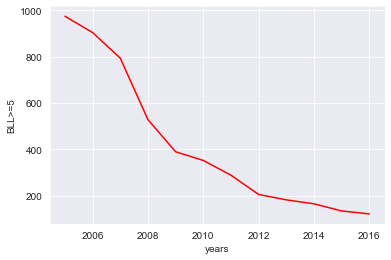

In [11]:
sns.set_style("darkgrid")
sns.lineplot(x="years", y="BLL>=5", color="red", data=df_timeSeries)

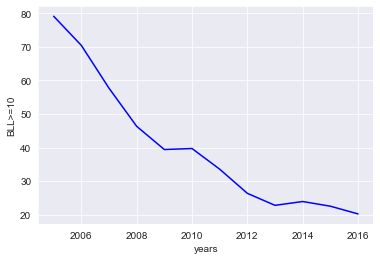

In [12]:
sns.set_style("darkgrid")
sns.lineplot(x="years", y="BLL>=10", color="blue", data=df_timeSeries)

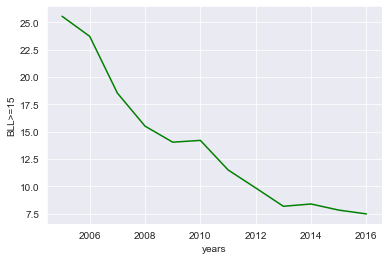

In [13]:
sns.set_style("darkgrid")
sns.lineplot(x="years", y="BLL>=15", color="green", data=df_timeSeries)

[12.75, 0.9166666666666666, 1.9166666666666667, 13.583333333333334, 3.8333333333333335, 25.833333333333332, 45.916666666666664, 2.6666666666666665, 16.916666666666668, 14.25, 8.333333333333334, 21.25, 11.416666666666666, 24.416666666666668, 9.416666666666666, 7.25, 1.0, 2.1666666666666665, 12.5, 8.333333333333334, 41.666666666666664, 11.75, 44.666666666666664, 28.916666666666668, 8.583333333333334, 15.166666666666666, 1.1666666666666667, 29.083333333333332, 1.25, 16.25, 4.25, 7.833333333333333, 26.0, 6.0, 16.916666666666668, 6.333333333333333, 21.916666666666668, 34.333333333333336, 12.416666666666666, 0.75, 5.333333333333333, 3.5833333333333335, 1.9166666666666667]


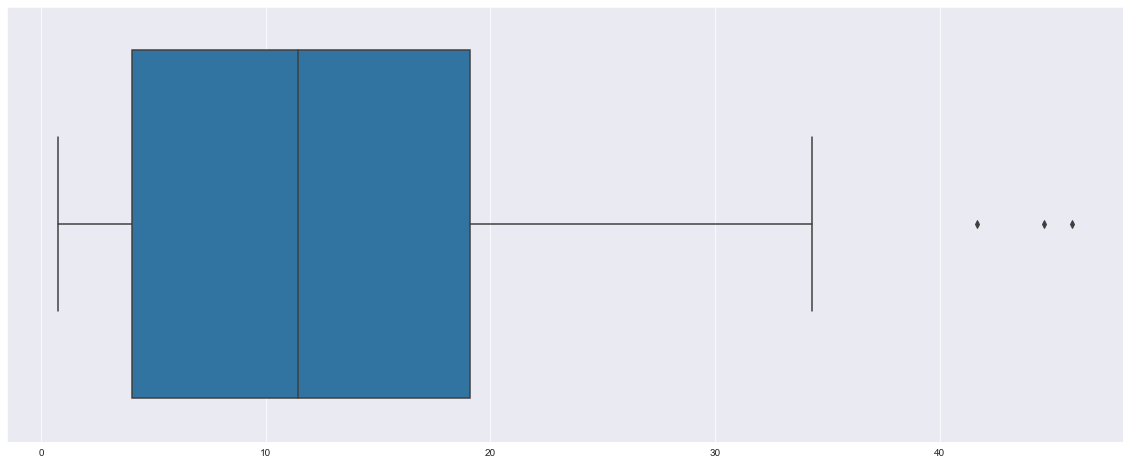

In [14]:
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.boxplot(x=new_avgs)
print(averages_List)

In [15]:
# Normalizing Distribution
# pre_avgs = []
# def normalize(loc):
#     total = 0
#     curNum = -1
#     countList = []
#     for i in df_bloodLvls["geo_area_name"]:
#         curNum += 1
#         if df_bloodLvls["geo_area_name"][curNum] == loc:
#             total += df_bloodLvls["Children under 6 years with elevated blood lead levels (BLL) Number BLL>=15 µg/dL"][curNum]
#             countList.append(df_bloodLvls["Children under 6 years with elevated blood lead levels (BLL) Number BLL>=15 µg/dL"][curNum])
#         else:
#             continue
#     averages_List.append(total/12)
#     return total, countList

pre_avgs = []
def normalize(location, column):
    curNum = -1
    countList = []
    total = 0
    for city in df_bloodLvls["geo_area_name"]:
        curNum += 1
        if location == city:
            num = df_bloodLvls[column][curNum]/df_bloodLvls["Children under 6 years with elevated blood lead levels (BLL) Number Tested"][curNum]
            total += num
            countList.append(str(num) + " " + str(df_bloodLvls["time_period"][curNum]))
        else:
            continue
    pre_avgs.append(total/12)
    return total/12, countList
    
        

In [16]:
for x in unique_cities:
    print(x, normalize(x, "Children under 6 years with elevated blood lead levels (BLL) Number BLL >=5 µg/dL"))
    

Northeast Bronx (0.04638345634548972, ['0.03493150684931507 2010', '0.018548387096774192 2014', '0.019696969696969695 2012', '0.036533333333333334 2009', '0.018615384615384617 2013', '0.057534246575342465 2008', '0.12147058823529412 2005', '0.10347826086956521 2006', '0.08901408450704225 2007', '0.02619718309859155 2011', '0.016271186440677966 2015', '0.014310344827586207 2016'])
Lower Manhattan (0.03524815115440116, ['0.005333333333333333 2015', '0.006875 2013', '0.003125 2016', '0.025 2010', '0.0825 2006', '0.1175 2005', '0.0125 2011', '0.082 2007', '0.010625 2012', '0.02909090909090909 2009', '0.0064285714285714285 2014', '0.042 2008'])
Chelsea - Clinton (0.04058442861461437, ['0.017619047619047618 2012', '0.006842105263157895 2015', '0.01411764705882353 2014', '0.02181818181818182 2010', '0.08857142857142856 2007', '0.10318181818181818 2005', '0.018636363636363635 2011', '0.08545454545454545 2006', '0.04045454545454545 2009', '0.0077777777777777776 2016', '0.06142857142857143 2008'

In [17]:
post_avgs = [num*100 for num in pre_avgs]
pre_avgs

data_perc = {'percentage':[0.04281228405989632,
 0.04940533210902779,
 0.04627197047432429,
 0.03056250322882549,
 0.0411019923647798,
 0.01576363391479021,
 0.04620347707715849,
 0.04234444855628685,
 0.029892926263853356,
 0.033445533024480396,
 0.07039073628676763,
 0.04638345634548972,
 0.04923491723974644,
 0.054181035266727205,
 0.047569084409144896,
 0.03300647999212133,
 0.05507983887378625,
 0.04058442861461437,
 0.039942472508327,
 0.04545726297128822,
 0.04303576981006101,
 0.06186094502207349,
 0.04854544053143173,
 0.04854298336130061,
 0.052680896880556355,
 0.05437447315931693,
 0.06756752457933472,
 0.06730336570252518,
 0.0195704988851728,
 0.04210489181076113,
 0.04205963624046144,
 0.05845717068878834,
 0.03524815115440116,
 0.022583257107534224,
 0.0512582517681402,
 0.04115177487791311,
 0.021647527910685808,
 0.05254493817355322,
 0.05227048809857823,
 0.030392793931916757,
 0.10856332753520498,
 0.05325962943357401,
 0.07705142348711261]}
df_perc = pd.DataFrame(data)

In [18]:
pre_avgs

[0.04638345634548972,
 0.03524815115440116,
 0.04058442861461437,
 0.04281228405989632,
 0.03300647999212133,
 0.05325962943357401,
 0.04923491723974644,
 0.03056250322882549,
 0.04940533210902779,
 0.04545726297128822,
 0.04234444855628685,
 0.05507983887378625,
 0.04210489181076113,
 0.04854298336130061,
 0.047569084409144896,
 0.0512582517681402,
 0.033445533024480396,
 0.022583257107534224,
 0.04627197047432429,
 0.030392793931916757,
 0.07705142348711261,
 0.05437447315931693,
 0.04205963624046144,
 0.07039073628676763,
 0.04303576981006101,
 0.10856332753520498,
 0.05845717068878834,
 0.06730336570252518,
 0.0195704988851728,
 0.04115177487791311,
 0.04854544053143173,
 0.052680896880556355,
 0.04620347707715849,
 0.0411019923647798,
 0.05227048809857823,
 0.039942472508327,
 0.06186094502207349,
 0.06756752457933472,
 0.05254493817355322,
 0.021647527910685808,
 0.054181035266727205,
 0.029892926263853356,
 0.01576363391479021]

C:\Users\SAM\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


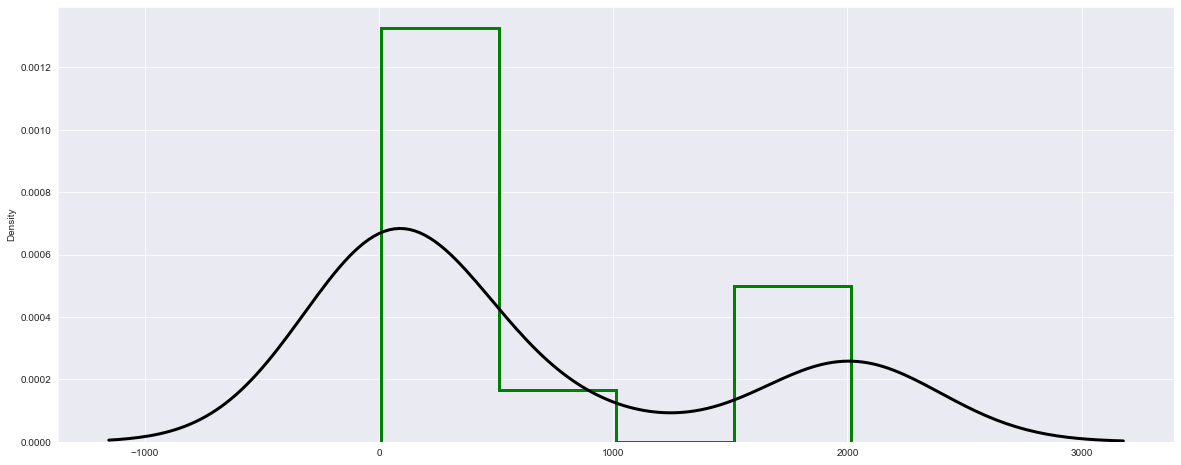

In [19]:
fig_dims = (20, 8)
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.distplot(df_perc, rug=False, rug_kws={"color": "g"}, kde_kws={"color": "k", "lw": 3, "label": "KDE"}, hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "g"})

In [20]:

unique_cities
df_cities = pd.DataFrame()
df_cities["Neighborhood"] = unique_cities
df_cities.to_excel('result.xlsx', index = False) 


In [21]:
df_povertyRate = pd.read_excel("daby.xlsx")
df_povertyRate

Neighborhood  % With Lead Risk  Poverty Rate  \
0                Bensonhurst - Bay Ridge          0.017237        20.000   
1                       Crotona -Tremont          0.013301        37.700   
2             Long Island City - Astoria          0.014000        17.000   
3                Kingsbridge - Riverdale          0.009200         0.278   
4                   Canarsie - Flatlands          0.012754         0.096   
5              South Beach - Tottenville          0.007568         9.300   
6                                Jamaica          0.017023        13.100   
7                       Southeast Queens          0.013103        13.000   
8                          Fresh Meadows          0.007632        13.000   
9            Gramercy Park - Murray Hill          0.003333        11.000   
10               Williamsburg - Bushwick          0.021059        24.000   
11                       Northeast Bronx          0.014310        21.900   
12                           West Queens          0.016121        19.000   
13                           East Harlem          0.007879        31.100   
14              Hunts Point - Mott Haven          0.012090        37.700   
15                       Upper West Side          0.006500         8.500   
16         Coney Island - Sheepshead Bay          0.022162        28.900   
17                     Chelsea - Clinton          0.007778        11.100   
18                             Rockaways          0.010870        16.400   
19                  Pelham - Throgs Neck          0.016937        23.000   
20                Stapleton - St. George          0.019048        21.660   
21                         East New York          0.016289        21.700   
22        Union Square - Lower East Side          0.008571         6.600   
23                      Southwest Queens          0.019636        13.000   
24  Central Harlem - Morningside Heights          0.013529        25.100   
25            Downtown - Heights - Slope          0.018056        15.900   
26    Bedford Stuyvesant - Crown Heights          0.019918        27.000   
27              East Flatbush - Flatbush          0.022056        10.200   
28                           Willowbrook          0.008636         9.300   
29              Ridgewood - Forest Hills          0.013696         9.800   
30              Greenwich Village - SoHo          0.010714         6.600   
31                       Lower Manhattan          0.003125        16.500   
32                       Upper East Side          0.003590         5.400   
33                         Port Richmond          0.022414        21.000   
34                    Washington Heights          0.008902        18.400   
35                 Bayside - Little Neck          0.005909         6.100   
36                           Sunset Park          0.012065        17.100   
37              High Bridge - Morrisania          0.015048        32.400   
38                  Flushing - Clearview          0.007708        14.300   
39                            Greenpoint          0.051429        23.700   
40                    Fordham - Bronx Pk          0.017563        36.400   
41                          Borough Park          0.035061        27.800   

    Median Income  Average Income        Borough  Unnamed: 6  \
0         55360.0        74157.00       Brooklyn         NaN   
1         26910.0             NaN          Bronx         NaN   
2         65392.0        97379.00         Queens         NaN   
3         58551.0        83674.00          Bronx         NaN   
4         67669.0        83059.00       Brooklyn         NaN   
5         80361.0        90629.89  Staten Island         NaN   
6         48559.0        76362.00         Queens         NaN   
7         72290.0        67190.00         Queens         NaN   
8         66483.0        80815.00         Queens         NaN   
9        115027.0       189311.94      Manhattan         NaN   
10        51413.0        91310.56       Brooklyn       

C:\Users\SAM\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


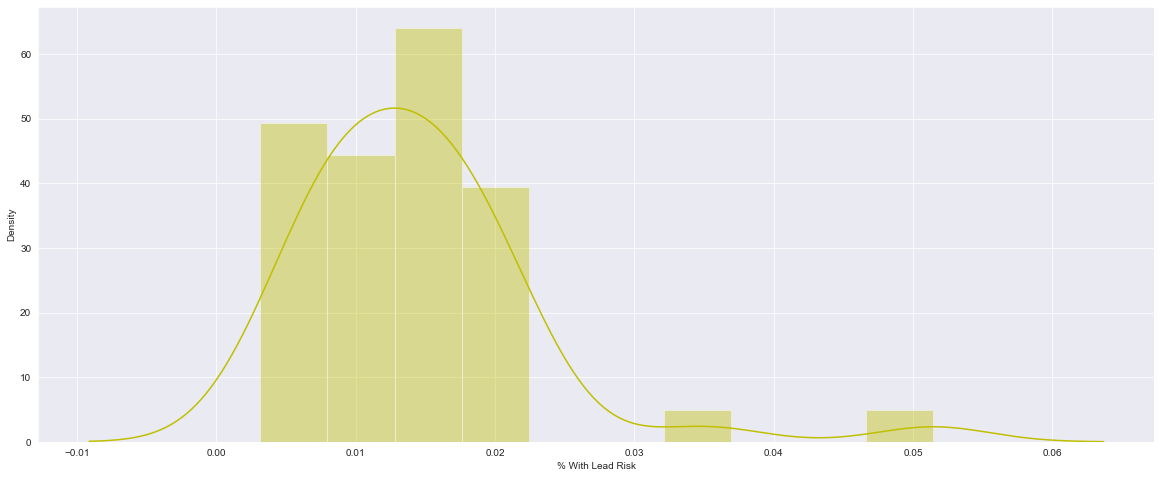

In [22]:
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.distplot(df_povertyRate["% With Lead Risk"], color="y")

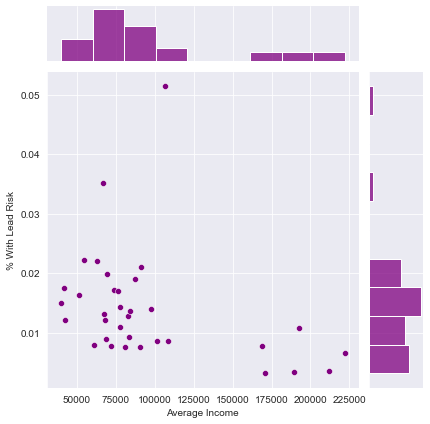

In [23]:
sns.jointplot(x='Average Income',y='% With Lead Risk',data=df_povertyRate,color='purple')

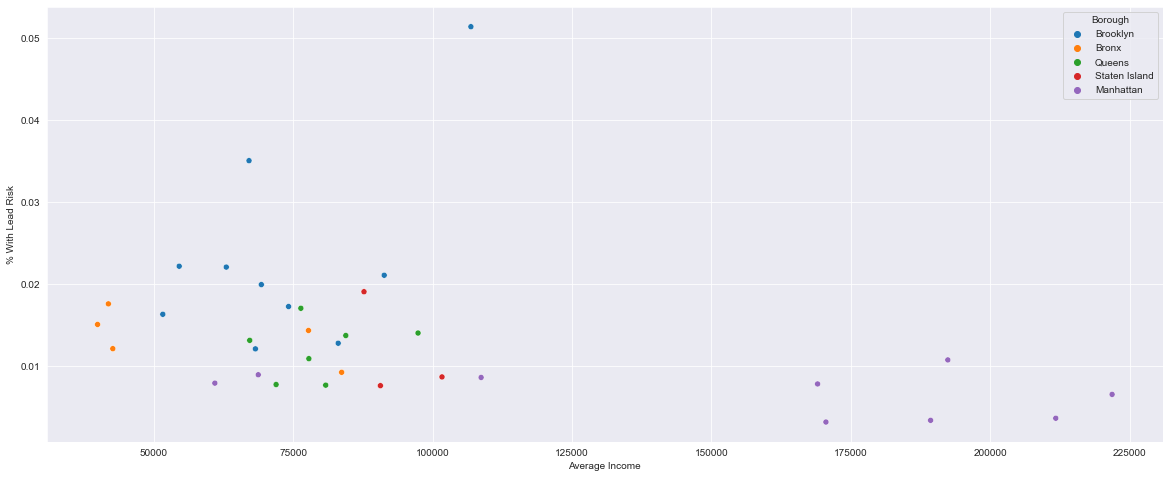

In [24]:
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=df_povertyRate, x="Average Income", y="% With Lead Risk", hue="Borough")

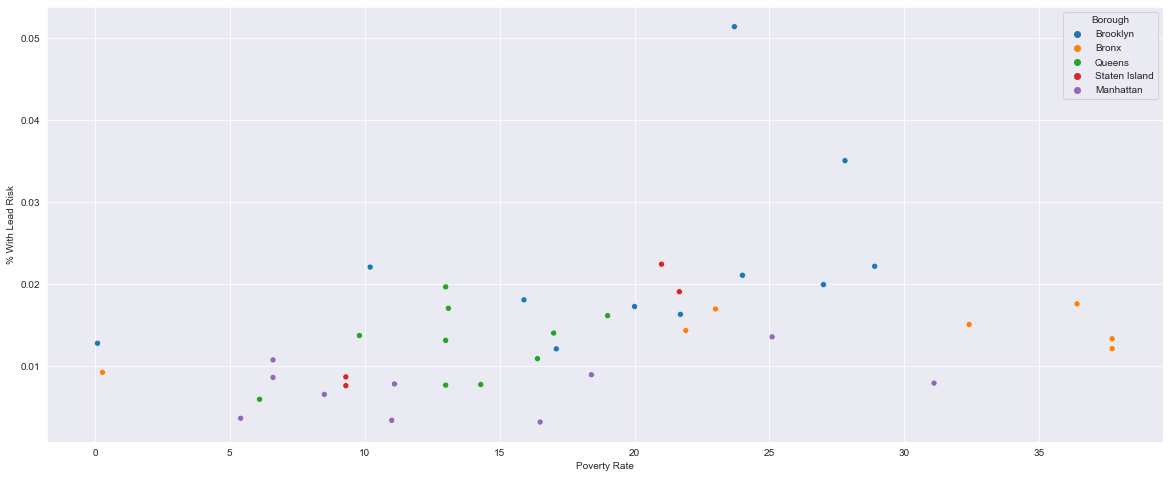

In [25]:
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=df_povertyRate, x="Poverty Rate", y="% With Lead Risk", hue="Borough")

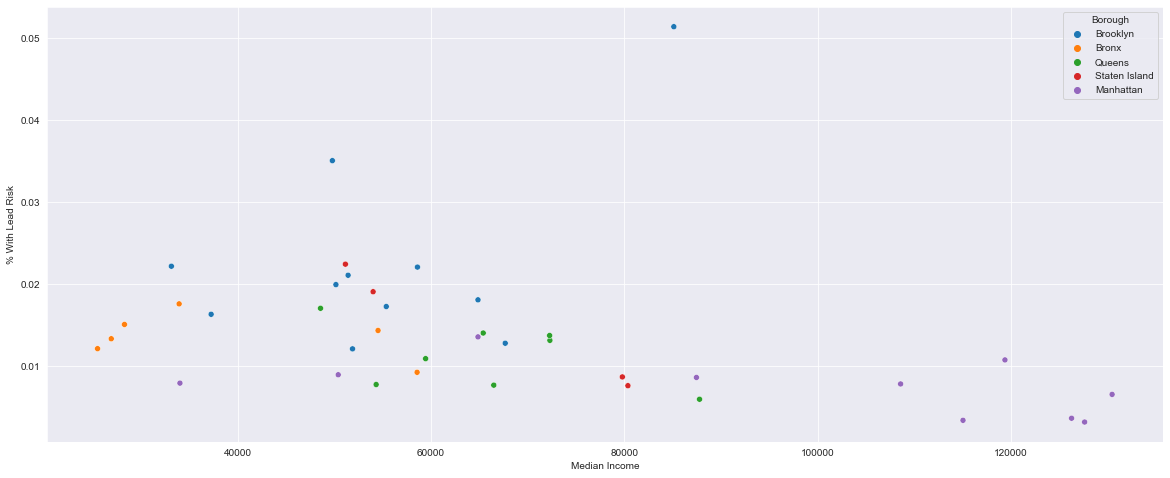

In [26]:
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=df_povertyRate, x="Median Income", y="% With Lead Risk", hue="Borough")

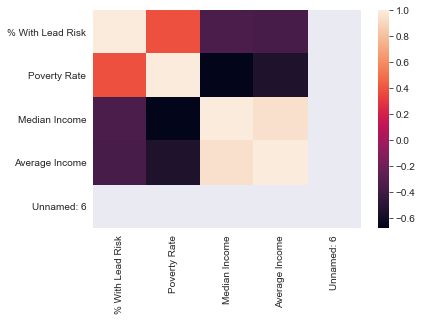

In [27]:

sns.heatmap(df_povertyRate.corr())


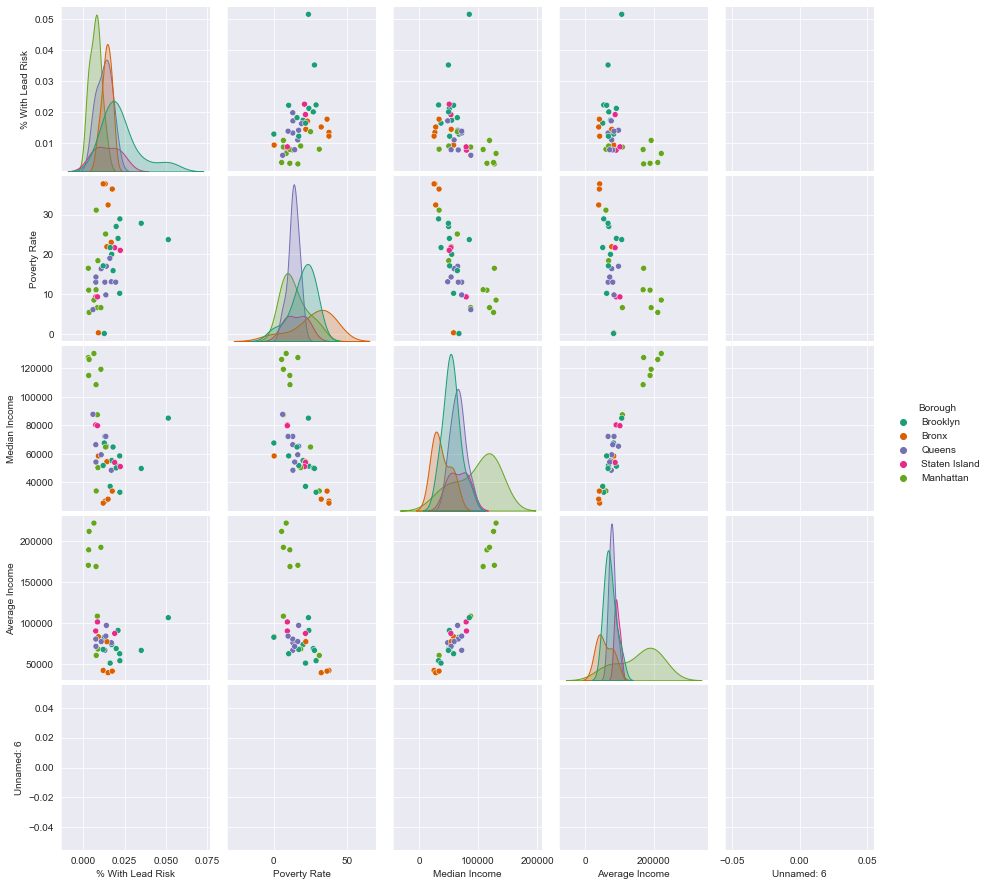

In [28]:
sns.pairplot(df_povertyRate,hue='Borough',palette='Dark2')

In [29]:
import geopandas as gpd
sns.set(style="darkgrid")

In [30]:
nb = 'geo_export_7e724bd2-6b59-45bb-a9ce-4ccfcba60fb3.shp'
regions = gpd.read_file(nb)

In [31]:
regions.sample(100)

boro_code      boro_name county_fip ntacode  \
166        5.0  Staten Island        085    SI14   
86         2.0          Bronx        005    BX05   
33         2.0          Bronx        005    BX08   
85         2.0          Bronx        005    BX43   
46         3.0       Brooklyn        047    BK27   
..         ...            ...        ...     ...   
58         1.0      Manhattan        061    MN14   
67         3.0       Brooklyn        047    BK42   
177        4.0         Queens        081    QN03   
125        4.0         Queens        081    QN25   
71         1.0      Manhattan        061    MN22   

                                  ntaname    shape_area    shape_leng  \
166       Grasmere-Arrochar-Ft. Wadsworth  4.093163e+07  39960.974988   
86             Bedford Park-Fordham North  1.499888e+07  22565.481193   
33                 West Farms-Bronx River  1.508499e+07  17477.294761   
85                                Norwood  1.572493e+07  22150.308220   
46                             Bath Beach  2.053462e+07  22383.743233   
..                                    ...           ...           ...   
58                         Lincoln Square  1.580559e+07  19869.908314   
67                               Flatbush  4.525481e+07  38737.853213   
177  Springfield Gardens South-Brookville  4.328870e+07  45322.165207   
125                                Corona  2.007732e+07  23868.641664   
71                           East Village  1.089424e+07  13555.232029   

                                              geometry  
166  POLYGON ((-74.08155 40.60629, -74.07778 40.606...  
86   POLYGON ((-73.88363 40.86726, -73.88443 40.866...  
33   POLYGON ((-73.86272 40.83292, -73.86367 40.832...  
85   POLYGON ((-73.88309 40.86660, -73.88363 40.867...  
46   POLYGON ((-74.00200 40.59413, -74.00219 40.594...  
..                                                 ...  
58   POLYGON ((-73.97500 40.77753, -73.97546 40.776...  
67   POLYGON ((-73.95871 40.65039, -73.95845 40.649...  
177  POLYGON ((-73.75763 40.66645, -73.75756 40.666...  
125  MULTIPOLYGON (((-73.85443 40.74885, -73.85437 ...  
71   POLYGON ((-73.98256 40.73135, -73.98247 40.731...  

[100 rows x 8 columns]

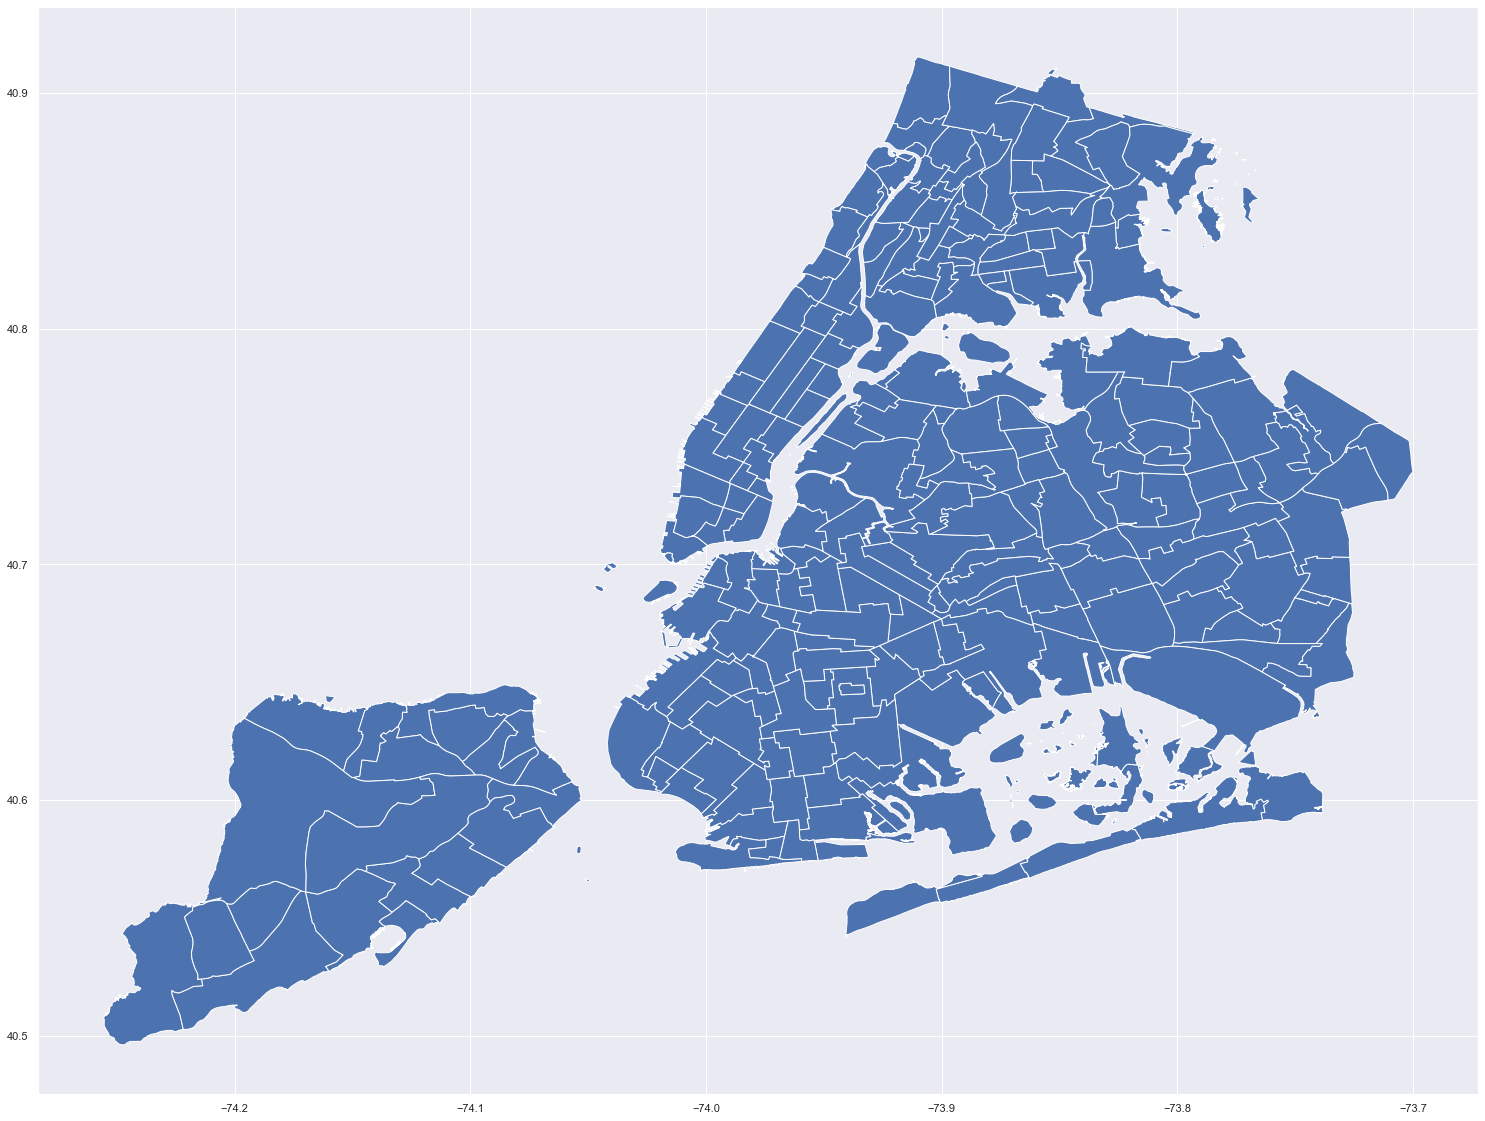

In [32]:
regions.plot(figsize=(40,20))
plt.show()

In [33]:
dab = pd.read_csv("data.csv")

In [34]:
dab.head(10)

ntaname  Unnamed: 1
0          Borough Park    0.035061
1           Murray Hill    0.007708
2         East Elmhurst         NaN
3               Erasmus         NaN
4                Hollis         NaN
5             Homecrest         NaN
6  Fresh Meadows-Utopia    0.007632
7              Longwood         NaN
8               Midwood         NaN
9            St. Albans    0.013103

In [35]:
merged = regions.set_index('ntaname').join(dab.set_index('ntaname'))
merged = merged.reset_index()
merged[['ntaname', 'shape_area', 'shape_leng', 'geometry', 'Unnamed: 1']].sample(5)

ntaname    shape_area    shape_leng  \
88         Mount Hope  1.471671e+07  18937.248153   
45   South Ozone Park  8.246139e+07  36708.169355   
133    Brighton Beach  1.718014e+07  21060.169544   
31        Fort Greene  1.648282e+07  19825.521059   
76          Yorkville  1.360206e+07  17998.720613   

                                              geometry  Unnamed: 1  
88   POLYGON ((-73.89561 40.85457, -73.89662 40.852...         NaN  
45   POLYGON ((-73.80577 40.68293, -73.80552 40.682...         NaN  
133  POLYGON ((-73.96035 40.58731, -73.96032 40.586...    0.022162  
31   POLYGON ((-73.96939 40.69608, -73.96938 40.695...         NaN  
76   MULTIPOLYGON (((-73.93805 40.78083, -73.93790 ...    0.003590

In [36]:
merged['Unnamed: 1'] = merged['Unnamed: 1'].fillna(0)

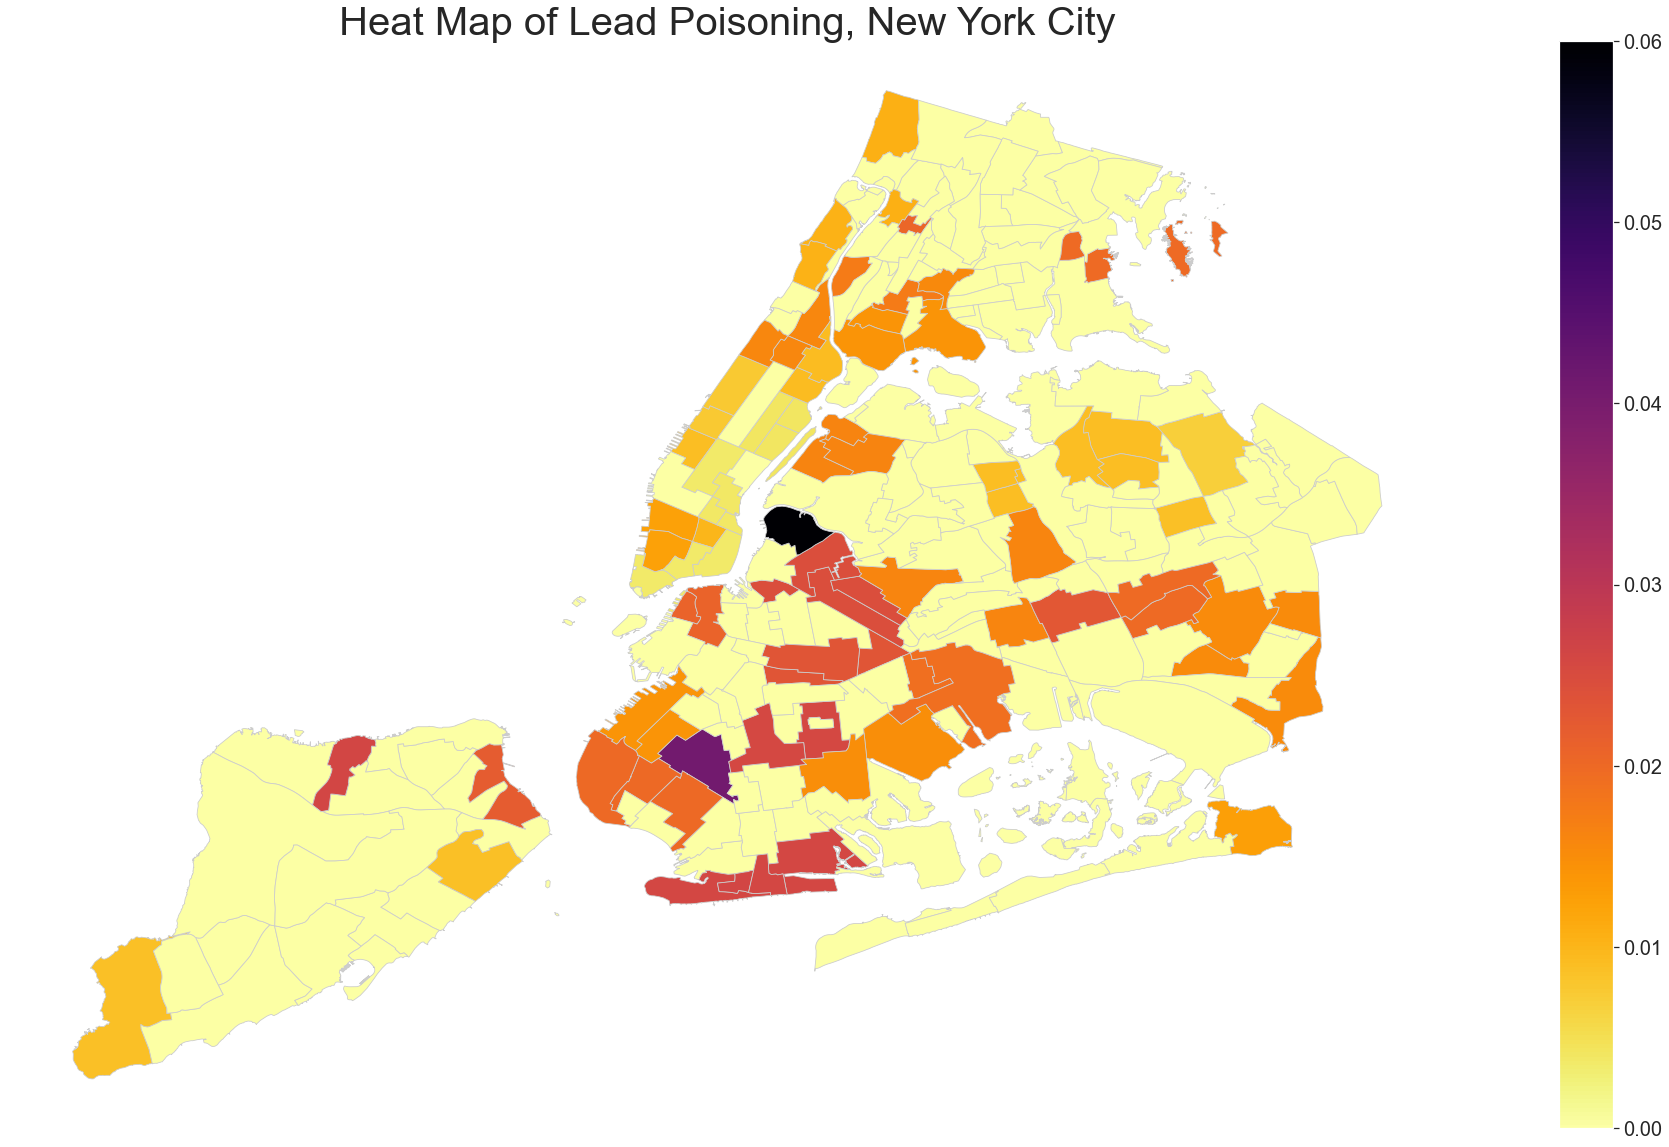

In [37]:
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Heat Map of Lead Poisoning, New York City', fontdict={'fontsize': '40', 'fontweight' : '3'})

color = 'inferno_r'
vmin, vmax = 0, 0.06
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)

merged.plot('Unnamed: 1', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))

In [38]:
import numpy as np
import pandas as pd 
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
import time
import datetime
from datetime import datetime, date,timedelta
from scipy import integrate, optimize
from scipy.integrate import odeint
import warnings
warnings.filterwarnings('ignore')

import os

# plotly library
import plotly
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.figure_factory as ff

#matplot lib
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import ticker

# ML libraries
import lightgbm as lgb
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import preprocessing, svm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,explained_variance_score
import sklearn 
import matplotlib.dates as dates

import mpld3
mpld3.enable_notebook()
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
matplotlib.style.use('ggplot')
import lmfit
from lmfit.lineshapes import gaussian, lorentzian

In [39]:
# Top 10 countries with Highest Number of Death Rates


fig = px.bar(df_povertyRate.sort_values('% With Lead Risk',ascending=False)[:10][::-1],x='% With Lead Risk',y='Neighborhood',title='Top 10 Countries with highest number of Death Cases',text='Borough',height=900, orientation='h')

#image_bytes = fig.to_image(format='png', , width=1200, height=700, scale=1) # you can use other formats as well (like 'svg','jpeg','pdf')
#img_bytes = fig.to_image(format="png")
#instead of using fig.show()
##from IPython.display import Image
#Image(img_bytes)
#fig.show()
plotly.offline.iplot(fig)

In [40]:
# Geo Code Sample
"""

from geopy import Nominatim


coord = (26.8393, 80.9231)

geolocator = Nominatim(user_agent='test/1')
location = geolocator.reverse('40.812285, -73.951209')

print(location.address)



"""

# Query through coordinates, track neighborhood + borough
# Graph frequencies, check if there is a correlation to lead-poisoning (hyper-localized)


# Add Linear regression to BLL >= 5 map to show curve flatlining

# New York City children screened for lead poisoning is 1.7%, under the national average of 2.5%

# Age of Houses is also a good dataset to examine in correspondence to lead poisoning

"\n\nfrom geopy import Nominatim\n\n\ncoord = (26.8393, 80.9231)\n\ngeolocator = Nominatim(user_agent='test/1')\nlocation = geolocator.reverse('40.812285, -73.951209')\n\nprint(location.address)\n\n\n\n"

In [41]:
df_bloodLvls.info


<bound method DataFrame.info of                   geo_type  geo_area_id             geo_area_name  borough_id  \
0                  Borough            1                     Bronx         1.0   
1                  Borough            1                     Bronx         1.0   
2                  Borough            1                     Bronx         1.0   
3                  Borough            1                     Bronx         1.0   
4                  Borough            1                     Bronx         1.0   
..                     ...          ...                       ...         ...   
571  Neighborhood (UHF 42)          104      Pelham - Throgs Neck         1.0   
572  Neighborhood (UHF 42)          301        Washington Heights         3.0   
573  Neighborhood (UHF 42)          407          Southwest Queens         4.0   
574  Neighborhood (UHF 42)          106  High Bridge - Morrisania         1.0   
575  Neighborhood (UHF 42)          103        Fordham - Bronx Pk         1.0

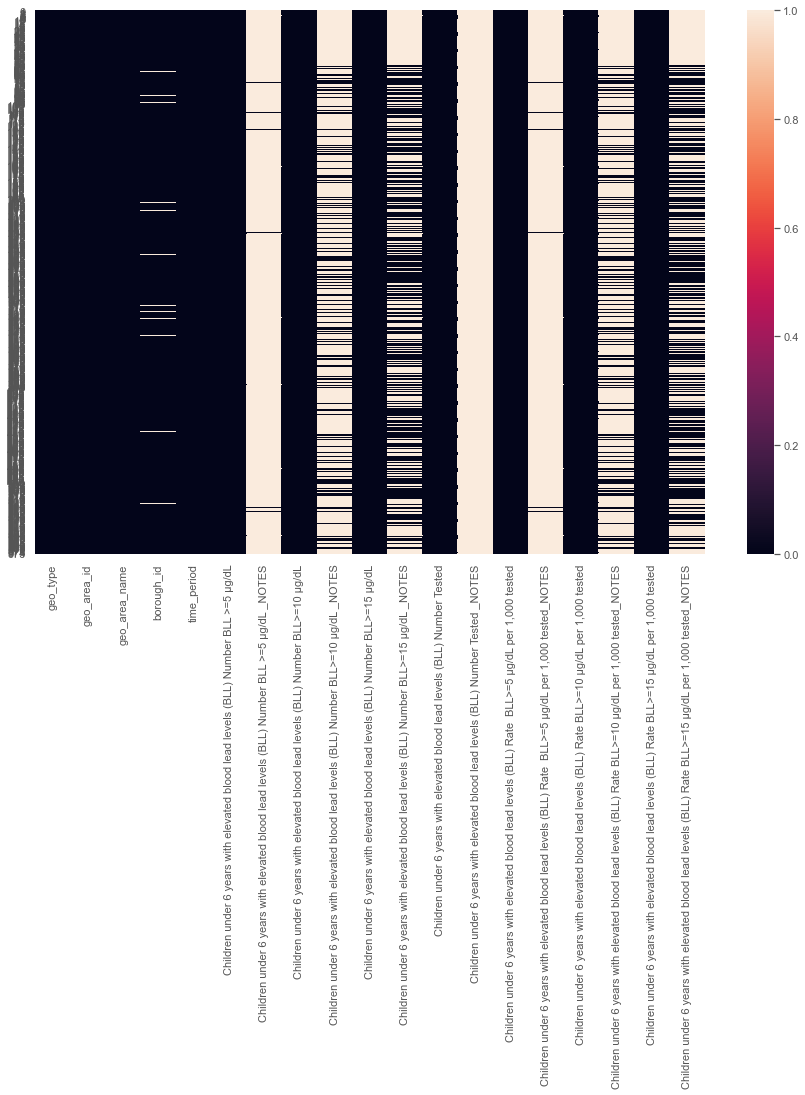

In [42]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df_bloodLvls.isnull(), xticklabels=1, yticklabels=1)

In [43]:
df_housing = pd.read_csv("Housing_Maintenance_Code_Violations (1).csv")

In [44]:
df_housing.head()

ViolationID  BuildingID  RegistrationID  BoroID    Borough HouseNumber  \
0     10000000      371632          337935       3   BROOKLYN        5603   
1     10000001       80102          211704       2      BRONX         751   
2     10000002      280425          330062       3   BROOKLYN          21   
3     10000003       28671          128101       1  MANHATTAN          28   
4     10000004        2163          127293       1  MANHATTAN         201   

  LowHouseNumber HighHouseNumber      StreetName  StreetCode  ...  \
0           5601            5603   SNYDER AVENUE       77930  ...   
1            751             751   GERARD AVENUE       35020  ...   
2             21              21  EAST 88 STREET       37730  ...   
3             18              28   THAYER STREET       32490  ...   
4            201             201  EAST 22 STREET       17430  ...   

   ViolationStatus RentImpairing   Latitude  Longitude  CommunityBoard  \
0            Close             N  40.650483 -73.924317            17.0   
1            Close             N  40.824936 -73.926456             4.0   
2             Open             N  40.650670 -73.920129            17.0   
3            Close             N  40.862245 -73.926307            12.0   
4            Close             N  40.738032 -73.983293             6.0   

  CouncilDistrict CensusTract        BIN           BBL  \
0            41.0       938.0  3103129.0  3.047040e+09   
1             8.0        63.0  2002971.0  2.024820e+09   
2            45.0       934.0  3103254.0  3.047090e+09   
3            10.0       285.0  1064213.0  1.021740e+09   
4             2.0        64.0  1082130.0  1.009030e+09   

                        NTA  
0      Rugby-Remsen Village  
1            West Concourse  
2      Rugby-Remsen Village  
3  Washington Heights North  
4                  Gramercy  

[5 rows x 41 columns]

In [1]:
x_data = np.array(df_timeSeries['years'])




log_x_data = np.log(x_data)
log_y_data = np.log(y)
curve_fit = np.polyfit(x_data, log_y_data, 1)
print(curve_fit)

NameError: name 'np' is not defined

In [59]:
c = np.array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

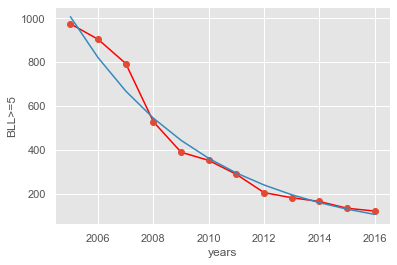

In [60]:


y2 = np.exp(418.078525) * np.exp(-0.205069439*x_data)
sns.lineplot(x="years", y="BLL>=5", color="red", data=df_timeSeries)
plt.plot(x_data, y, "o")
plt.plot(x_data, y2)


In [61]:
df_povertyRate.head()

Neighborhood  % With Lead Risk  Poverty Rate  Median Income  \
0     Bensonhurst - Bay Ridge          0.017237        20.000        55360.0   
1            Crotona -Tremont          0.013301        37.700        26910.0   
2  Long Island City - Astoria          0.014000        17.000        65392.0   
3     Kingsbridge - Riverdale          0.009200         0.278        58551.0   
4        Canarsie - Flatlands          0.012754         0.096        67669.0   

   Average Income   Borough  Unnamed: 6 Unnamed: 7  
0         74157.0  Brooklyn         NaN        NaN  
1             NaN     Bronx         NaN        NaN  
2         97379.0    Queens         NaN        NaN  
3         83674.0     Bronx         NaN        NaN  
4         83059.0  Brooklyn         NaN        NaN

In [62]:
df_pov = df_povertyRate

In [63]:
del df_pov["Unnamed: 6"]
del df_pov["Unnamed: 7"]

In [64]:
%matplotlib inline

In [65]:
import missingno as ms

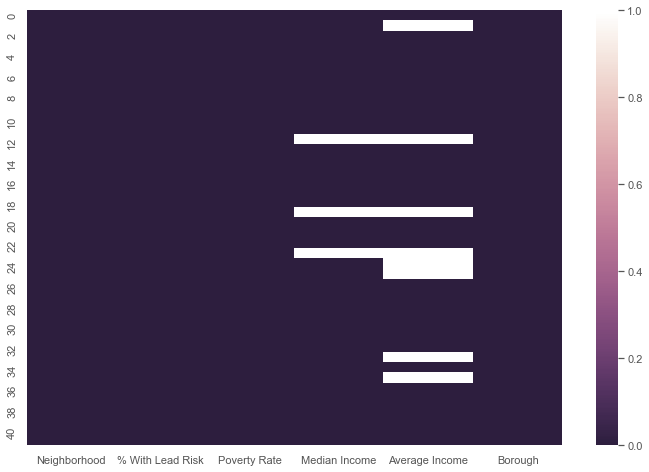

In [66]:
plt.figure(figsize=(12,8))
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(df_pov.isnull(), cmap=cmap)

In [67]:
df_pov.to_excel("missingVals.xlsx")

In [68]:
df_pov_u = pd.read_excel("updated_vals.xlsx")

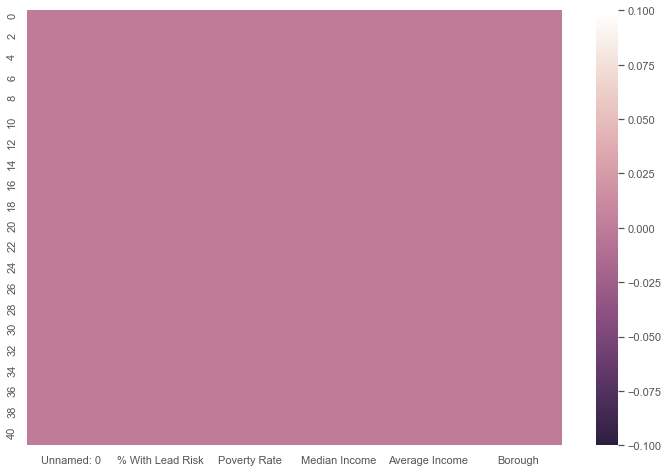

In [69]:
plt.figure(figsize=(12,8))
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(df_pov_u.isnull(), cmap=cmap)

In [70]:
from sklearn.cluster import KMeans

In [71]:
kmeans = KMeans(n_clusters=4)

In [72]:
kmeans.fit(df_pov_u.drop('Borough', axis=1))

KMeans(n_clusters=4)

In [73]:
df_pov_u

Unnamed: 0  % With Lead Risk  Poverty Rate  Median Income  Average Income  \
0            0          0.017237        20.000          55360        74157.00   
1            1          0.013301        37.700          27143        38053.69   
2            2          0.014000        17.000          65392        97379.00   
3            3          0.009200         0.278          58551        83674.00   
4            4          0.012754         0.096          67669        83059.00   
5            5          0.007568         9.300          80361        90629.89   
6            6          0.017023        13.100          48559        76362.00   
7            7          0.013103        13.000          72290        67190.00   
8            8          0.007632        13.000          66483        80815.00   
9            9          0.003333        11.000         115027       189311.94   
10          10          0.021059        24.000          51413        91310.56   
11          11          0.014310        21.900          54510        77729.43   
12          12          0.016121        19.000          65098        86383.00   
13          13          0.007879        31.100          34016        60934.00   
14          14          0.012090        37.700          25493        42633.00   
15          15          0.006500         8.500         130452       221867.00   
16          16          0.022162        28.900          33131        54541.00   
17          17          0.007778        11.100         108570       169040.22   
18          18          0.010870        16.400          59431        77799.00   
19          19          0.016937        23.000          74796        90281.00   
20          20          0.019048        21.660          54000        87685.99   
21          21          0.016289        21.700          37243        51599.00   
22          22          0.008571         6.600          87449       108692.00   
23          23          0.019636        13.000          70442        84862.72   
24          24          0.013529        25.100          64850        85930.00   
25          25          0.018056        15.900          64850       141709.00   
26          26          0.019918        27.000          50153        69272.00   
27          27          0.022056        10.200          58588        62986.38   
28          28          0.008636         9.300          79787       101676.00   
29          29          0.013696         9.800          72261        84423.00   
30          30          0.010714         6.600         119366       192400.04   
31          31          0.003125        16.500         127607       170539.00   
32          32          0.003590         5.400         126258       211762.00   
33          33          0.022414        21.000          51135        88159.00   
34          34          0.008902        18.400          50391        68721.00   
35          35          0.005909         6.100          87770       110569.00   
36          36          0.012065        17.100          51870        68211.00   
37          37          0.015048        32.400          28277        39896.00   
38          38          0.007708        14.300          54314        71919.00   
39          39          0.051429        23.700          85111       106860.00   
40          40          0.017563        36.400          33932        41842.00   
41          41          0.035061        27.800          49785        67063.00   

          Borough  
0        Brooklyn  
1           Bronx  
2          Queens  
3           Bronx  
4        Brooklyn  
5   Staten Island  
6          Queens  
7          Queens  
8          Queens  
9       Manhattan  
10       Brooklyn  
11          Bronx  
12         Queens  
13      Manhattan  
14          Bronx  
15      Manhattan  
16       Brooklyn  
17      Manhattan  
18         Queens  
19          Bronx  
20  Staten Island  
21       Brooklyn  
22      Manhattan  
23         Queens  
24      Manhattan  


In [74]:
kmeans.cluster_centers_

array([[2.02857143e+01, 1.49043967e-02, 3.22714286e+01, 3.13192857e+04,
        4.70712414e+04],
       [2.23333333e+01, 5.84002340e-03, 9.85000000e+00, 1.21213333e+05,
        1.92486700e+05],
       [1.95238095e+01, 1.58734540e-02, 1.64825714e+01, 5.84358571e+04,
        7.79862895e+04],
       [2.18750000e+01, 1.63881893e-02, 1.38625000e+01, 7.81895000e+04,
        1.05974486e+05]])

In [75]:
y_kmeans = kmeans.predict(df_pov_u.drop('Borough', axis=1))

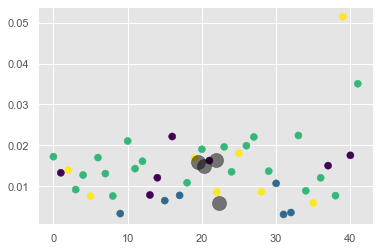

In [76]:
plt.scatter(df_pov_u.iloc[:, 0], df_pov_u.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [77]:
def converter(cluster):
    if cluster == "Brooklyn":
        return 1
    if cluster == "Manhattan":
        return 2
    if cluster == "Staten Island":
        return 3
    if cluster == "Bronx":
        return 4
    if cluster == "Queens":
        return 5

In [78]:
df_pov["Cluster"] = df_pov["Borough"].apply(converter)

In [79]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df_pov['Cluster'],kmeans.labels_))
print(classification_report(df_pov['Cluster'],kmeans.labels_))

[[0 0 0 0 0 0]
 [2 0 7 2 0 0]
 [1 6 2 1 0 0]
 [0 0 2 2 0 0]
 [4 0 2 1 0 0]
 [0 0 8 2 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00        11
           2       0.10      0.20      0.13        10
           3       0.25      0.50      0.33         4
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        10

    accuracy                           0.10        42
   macro avg       0.06      0.12      0.08        42
weighted avg       0.05      0.10      0.06        42



In [80]:
from sklearn.preprocessing import StandardScaler

In [89]:
df_pov_u


Unnamed: 0  % With Lead Risk  Poverty Rate  Median Income  Average Income  \
0            0          0.017237        20.000          55360        74157.00   
1            1          0.013301        37.700          27143        38053.69   
2            2          0.014000        17.000          65392        97379.00   
3            3          0.009200         0.278          58551        83674.00   
4            4          0.012754         0.096          67669        83059.00   
5            5          0.007568         9.300          80361        90629.89   
6            6          0.017023        13.100          48559        76362.00   
7            7          0.013103        13.000          72290        67190.00   
8            8          0.007632        13.000          66483        80815.00   
9            9          0.003333        11.000         115027       189311.94   
10          10          0.021059        24.000          51413        91310.56   
11          11          0.014310        21.900          54510        77729.43   
12          12          0.016121        19.000          65098        86383.00   
13          13          0.007879        31.100          34016        60934.00   
14          14          0.012090        37.700          25493        42633.00   
15          15          0.006500         8.500         130452       221867.00   
16          16          0.022162        28.900          33131        54541.00   
17          17          0.007778        11.100         108570       169040.22   
18          18          0.010870        16.400          59431        77799.00   
19          19          0.016937        23.000          74796        90281.00   
20          20          0.019048        21.660          54000        87685.99   
21          21          0.016289        21.700          37243        51599.00   
22          22          0.008571         6.600          87449       108692.00   
23          23          0.019636        13.000          70442        84862.72   
24          24          0.013529        25.100          64850        85930.00   
25          25          0.018056        15.900          64850       141709.00   
26          26          0.019918        27.000          50153        69272.00   
27          27          0.022056        10.200          58588        62986.38   
28          28          0.008636         9.300          79787       101676.00   
29          29          0.013696         9.800          72261        84423.00   
30          30          0.010714         6.600         119366       192400.04   
31          31          0.003125        16.500         127607       170539.00   
32          32          0.003590         5.400         126258       211762.00   
33          33          0.022414        21.000          51135        88159.00   
34          34          0.008902        18.400          50391        68721.00   
35          35          0.005909         6.100          87770       110569.00   
36          36          0.012065        17.100          51870        68211.00   
37          37          0.015048        32.400          28277        39896.00   
38          38          0.007708        14.300          54314        71919.00   
39          39          0.051429        23.700          85111       106860.00   
40          40          0.017563        36.400          33932        41842.00   
41          41          0.035061        27.800          49785        67063.00   

          Borough  
0        Brooklyn  
1           Bronx  
2          Queens  
3           Bronx  
4        Brooklyn  
5   Staten Island  
6          Queens  
7          Queens  
8          Queens  
9       Manhattan  
10       Brooklyn  
11          Bronx  
12         Queens  
13      Manhattan  
14          Bronx  
15      Manhattan  
16       Brooklyn  
17      Manhattan  
18         Queens  
19          Bronx  
20  Staten Island  
21       Brooklyn  
22      Manhattan  
23         Queens  
24      Manhattan  


In [90]:
df_pov_u.drop("Unnamed: 0", axis=1, inplace=True)

In [92]:
df_pov_u["Cluster"] = df_pov_u["Borough"].apply(converter)

In [94]:
from sklearn.preprocessing import StandardScaler

In [100]:
scaler = StandardScaler()
df_pov_u.drop("Borough", axis=1, inplace=True)
scaler.fit(df_pov_u)

StandardScaler()

In [102]:
scaled_data = scaler.transform(df_pov_u)


In [103]:
from sklearn.decomposition import PCA

In [153]:
pca = PCA(n_components=2)

In [154]:
pca.fit(scaled_data)

PCA(n_components=2)

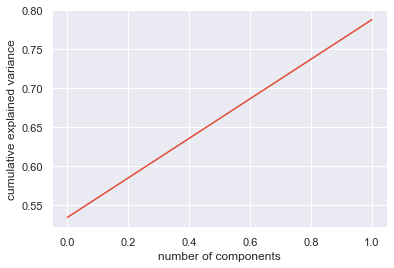

In [223]:

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [155]:
x_pca = pca.transform(scaled_data)

In [156]:

scaled_data.shape

(42, 5)

In [157]:

x_pca.shape

(42, 2)

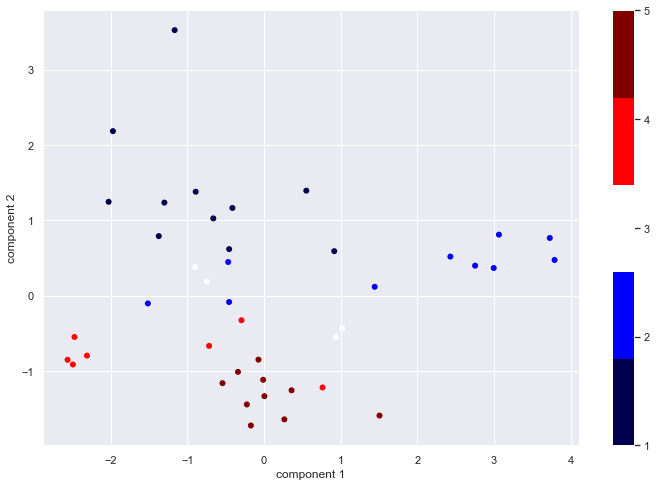

In [246]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(x_pca[:, 0], x_pca[:, 1],
            c=df_pov_u["Cluster"], lw=0.1, edgecolor='none', alpha=1,
            cmap=plt.cm.get_cmap('seismic', 5))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(ticks=[1,2,3,4,5])
plt.clim(1, 5)

In [159]:
pca.explained_variance_ratio_

array([0.53446712, 0.25357988])